# How to Calculate Sortino Ratio?

The Sortino ratio is calculated in the same manner as the Sharpe ratio, except it focuses on downside risk rather than volatility in general. It is calculated by dividing an asset's excess returns (realized returns minus the risk-free rate) and dividing by the standard deviation of the downside.

$$ Sortino_Ratio = \frac{r_{p}-r_{f}}{\sigma_{d}} $$

 - Portfolio Return (rp): The return on a portfolio, either on a historical basis (i.e. actual results).
 - Risk-Free Rate (rf)  : The risk-free rate is the return received on default-free securities.
 - Downside Standard Deviation (σd): The standard deviation of solely the investment’s or portfolio’s negative returns, i.e. the downside deviation.

Sources:
- https://www.investopedia.com/ask/answers/010815/what-difference-between-sharpe-ratio-and-sortino-ratio.asp#:~:text=The%20Sortino%20ratio%20is%20calculated,standard%20deviation%20of%20the%20downside.
- https://www.pyquantnews.com/the-pyquant-newsletter/how-to-measure-your-risk-adjusted-returns-sortino 


In [10]:
import yfinance as yf
import numpy as np

In [11]:
data = yf.download(["SPY","AAPL"], start="2020-01-01", end="2025-04-01")
close = data["Close"]
print(close)

[*********************100%***********************]  2 of 2 completed

Ticker            AAPL         SPY
Date                              
2020-01-02   72.716064  300.291504
2020-01-03   72.009132  298.017700
2020-01-06   72.582916  299.154602
2020-01-07   72.241547  298.313477
2020-01-08   73.403641  299.903290
...                ...         ...
2025-03-25  223.750000  575.460022
2025-03-26  221.529999  568.590027
2025-03-27  223.850006  567.080017
2025-03-28  217.899994  555.659973
2025-03-31  222.130005  559.390015

[1318 rows x 2 columns]


In [12]:
spy_returns = close["SPY"].pct_change().dropna()
aapl_returns = close["AAPL"].pct_change().dropna()

In [22]:
def sortino_ratio(returns, adjustment_factor=0.0, risk_free_rate=0.0):
    """
    Determines the Sortino ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sortino_ratio : float

    Note
    -----
    See `<https://www.sunrisecapital.com/wp-content/uploads/2014/06/Futures_
    Mag_Sortino_0213.pdf>`__ for more details.
    """
    
    # compute annualized return
    returns_risk_adj = np.asanyarray(returns - adjustment_factor)
    mean_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
    downside_diff = np.clip(returns_risk_adj, -np.inf, 0)  # Changed np.NINF to -np.inf
    np.square(downside_diff, out=downside_diff)
    annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)
    
    return mean_annual_return / annualized_downside_deviation

In [23]:
# Sortino ratio for SPY
spy_sortino = sortino_ratio(spy_returns)
print(f"SPY Sortino Ratio: {spy_sortino:.4f}")

# Sortino ratio for AAPL
aapl_sortino = sortino_ratio(aapl_returns)
print(f"AAPL Sortino Ratio: {aapl_sortino:.4f}")

SPY Sortino Ratio: 0.9436
AAPL Sortino Ratio: 1.2290


<Axes: xlabel='Date'>

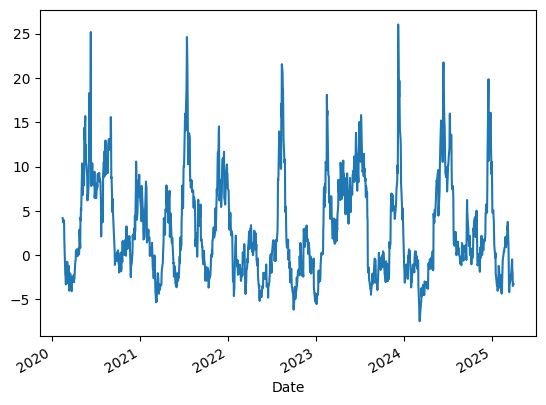

In [24]:
aapl_returns.rolling(30).apply(sortino_ratio).plot()

<Axes: >

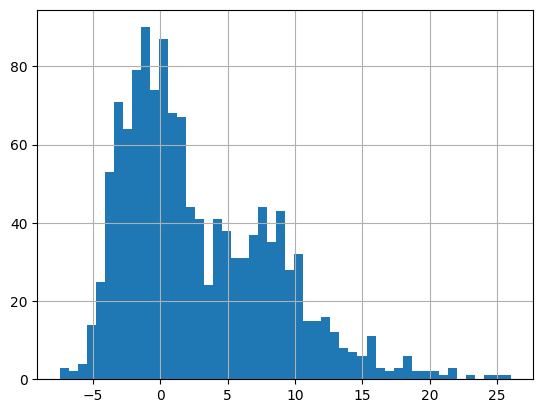

In [25]:
aapl_returns.rolling(30).apply(sortino_ratio).hist(bins=50)

<Axes: >

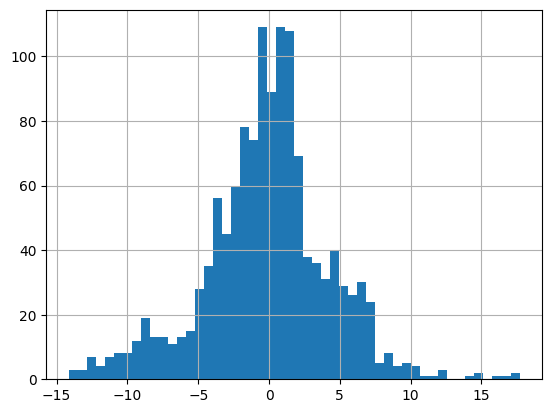

In [26]:
(
    aapl_returns.rolling(30).apply(sortino_ratio)
    - spy_returns.rolling(30).apply(sortino_ratio)
).hist(bins=50)